In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pd.read_csv(r"C:\Users\HP\Documents\BTC-USD.csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2783,2022-05-01,37713.265625,38627.859375,37585.789063,38469.093750,38469.093750,27002760110
2784,2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
2785,2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244
2786,2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490


In [6]:
df=pd.read_csv(r"C:\Users\HP\Documents\BTC-USD.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2788 non-null   object 
 1   Open       2788 non-null   float64
 2   High       2788 non-null   float64
 3   Low        2788 non-null   float64
 4   Close      2788 non-null   float64
 5   Adj Close  2788 non-null   float64
 6   Volume     2788 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 152.6+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2.788000e+03
mean,12114.051628,12432.075536,11764.920824,12126.416572,12126.416572,1.504640e+10
std,16612.538889,17044.777808,16119.346993,16615.381435,16615.381435,1.988339e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,612.573471,618.876495,609.665756,613.742477,613.742477,8.317548e+07
50%,6457.810059,6549.650147,6353.985107,6466.239990,6466.239990,5.401853e+09
75%,11024.040039,11388.611572,10722.320557,11056.325195,11056.325195,2.558002e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [12]:
# Convert 'Date' column to datetime for proper analysis
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
print(df['Date'])

0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
2783   2022-05-01
2784   2022-05-02
2785   2022-05-03
2786   2022-05-04
2787   2022-05-05
Name: Date, Length: 2788, dtype: datetime64[ns]


In [13]:
# Find the dates with the highest, lowest, and closing prices
highest_open = df.loc[df['Open'].idxmax()]
lowest_open = df.loc[df['Open'].idxmin()]
highest_close = df.loc[df['Close'].idxmax()]
lowest_close = df.loc[df['Close'].idxmin()]


In [29]:
print(highest_open)

Date         2021-11-09 00:00:00
Open                67549.734375
High                68530.335938
Low                   66382.0625
Close               66971.828125
Adj Close           66971.828125
Volume               42357991721
Name: 2610, dtype: object


In [30]:
print(lowest_open)

Date         2015-01-15 00:00:00
Open                  176.897003
High                  229.067001
Low                   176.897003
Close                 209.843994
Adj Close             209.843994
Volume                  81773504
Name: 120, dtype: object


In [31]:
print(highest_close)

Date         2021-11-08 00:00:00
Open                63344.066406
High                67673.742188
Low                 63344.066406
Close               67566.828125
Adj Close           67566.828125
Volume               41125608330
Name: 2609, dtype: object


In [32]:
print(lowest_close)

Date         2015-01-14 00:00:00
Open                  223.893997
High                  223.893997
Low                   171.509995
Close                 178.102997
Adj Close             178.102997
Volume                  97638704
Name: 119, dtype: object


In [15]:
# Store results in a dictionary for easier reference
price_analysis = {
    "highest_open": highest_open[['Date', 'Open']].to_dict(),
    "lowest_open": lowest_open[['Date', 'Open']].to_dict(),
    "highest_close": highest_close[['Date', 'Close']].to_dict(),
    "lowest_close": lowest_close[['Date', 'Close']].to_dict()
}


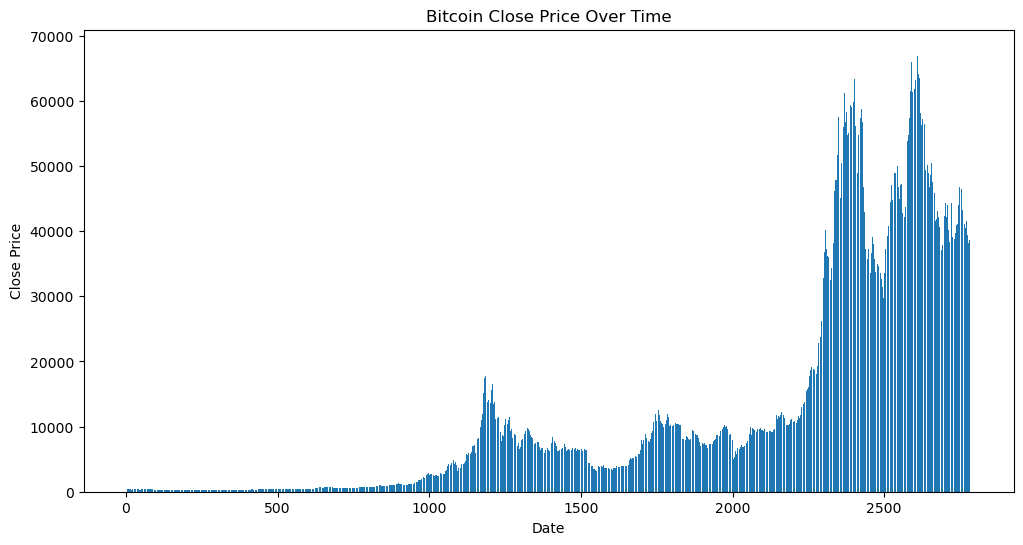

In [16]:
# Create a bar plot of the 'Close' price over time
plt.figure(figsize=(12,6))
plt.bar(df.index, df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.show()

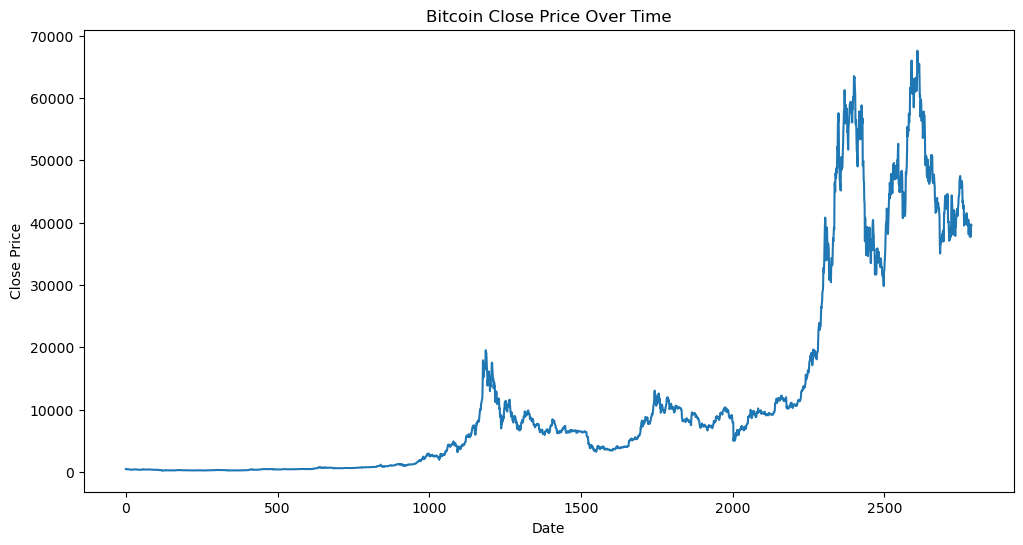

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.show()

In [18]:
# Calculate daily high-low volatility
df['Volatility'] = df['High'] - df['Low']


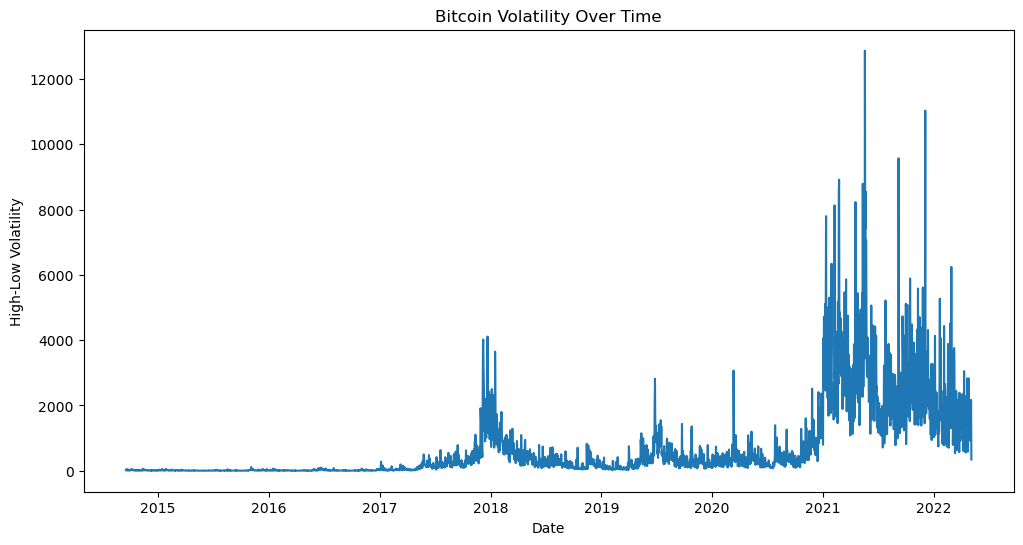

In [19]:
# Plot volatility over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volatility'])
plt.xlabel('Date')
plt.ylabel('High-Low Volatility')
plt.title('Bitcoin Volatility Over Time')
plt.show()



In [20]:
# Calculate daily percentage change volatility
df['Pct_Change'] = df['Close'].pct_change()


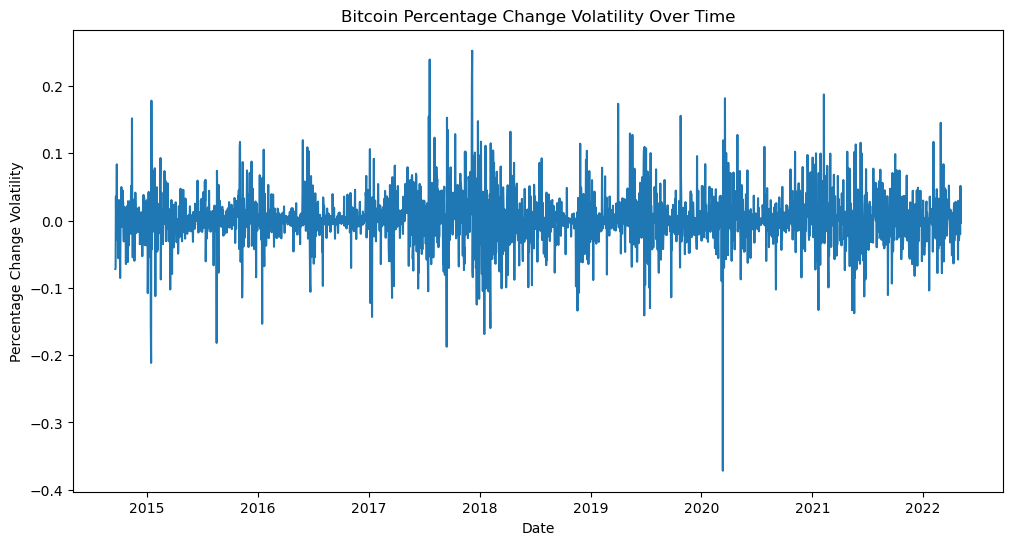

In [21]:
# Plot percentage change volatility over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Pct_Change'])
plt.xlabel('Date')
plt.ylabel('Percentage Change Volatility')
plt.title('Bitcoin Percentage Change Volatility Over Time')
plt.show()

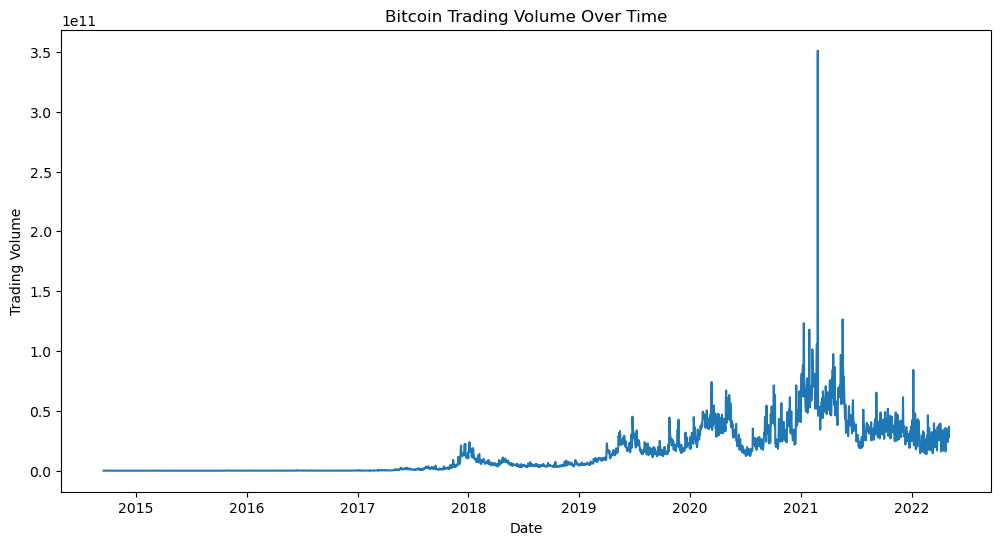

In [22]:
# Plot volume trends over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'])
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Bitcoin Trading Volume Over Time')
plt.show()


In [23]:
# Identify high-volume days (e.g., top 10 days with highest volume)
high_volume_days = df.nlargest(10, 'Volume')


           Date          Open          High           Low         Close  \
2354 2021-02-26  47180.464844  48370.785156  44454.843750  46339.761719   
2436 2021-05-19  42944.976563  43546.117188  30681.496094  37002.441406   
2308 2021-01-11  38346.531250  38346.531250  30549.599609  35566.656250   
2326 2021-01-29  34318.671875  38406.261719  32064.814453  34316.386719   
2351 2021-02-23  54204.929688  54204.929688  45290.589844  48824.425781   
2336 2021-02-08  38886.828125  46203.929688  38076.324219  46196.464844   
2405 2021-04-18  60701.886719  61057.457031  52829.535156  56216.183594   
2430 2021-05-13  49735.433594  51330.843750  46980.019531  49716.191406   
2350 2021-02-22  57532.738281  57533.390625  48967.566406  54207.320313   
2337 2021-02-09  46184.992188  48003.722656  45166.960938  46481.105469   

         Adj Close        Volume    Volatility  Pct_Change  
2354  46339.761719  350967941479   3915.941406   -0.016012  
2436  37002.441406  126358098747  12864.621094   -0.

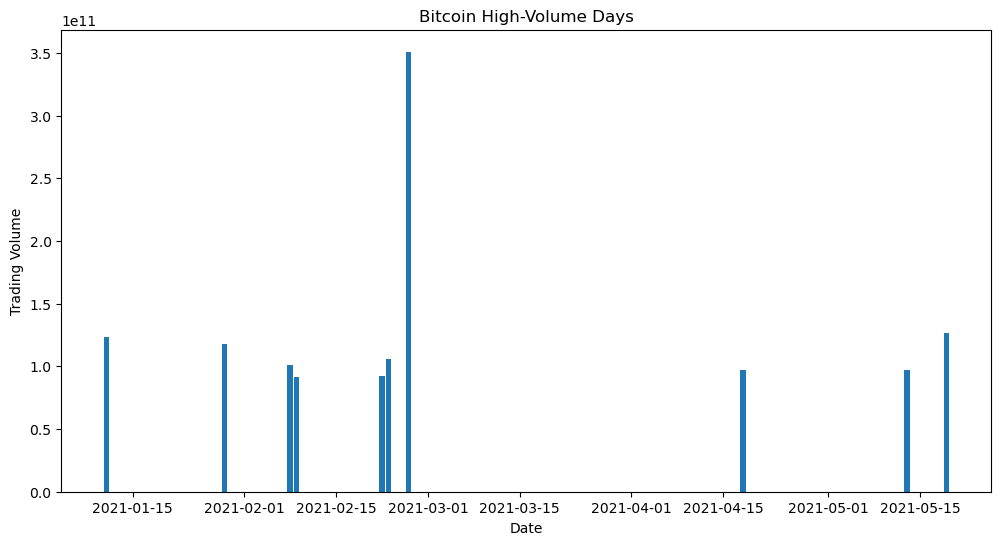

In [24]:
# Print high-volume days
print(high_volume_days)

# Plot high-volume days
plt.figure(figsize=(12,6))
plt.bar(high_volume_days['Date'], high_volume_days['Volume'])
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Bitcoin High-Volume Days')
plt.show()

In [25]:
# Calculate correlation coefficient between 'Close' price and 'Volume'
correlation_coefficient = df['Close'].corr(df['Volume'])

print(f'Correlation Coefficient: {correlation_coefficient:.4f}')


Correlation Coefficient: 0.7213


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [28]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\HP\Documents\BTC-USD.csv")

In [4]:
Target=df['Close']

In [5]:
Target

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2783    38469.093750
2784    38529.328125
2785    37750.453125
2786    39698.371094
2787    39568.812500
Name: Close, Length: 2788, dtype: float64

In [8]:
feature=df.drop(columns=['Low',	'Close',	'Adj Close',	'Volume', 'Date'])

In [9]:
feature

,Open,High
0,465.864014,468.174011
1,456.859985,456.859985
2,424.102997,427.834991
3,394.673004,423.295990
4,408.084991,412.425995
...,...,...
2783,37713.265625,38627.859375
2784,38472.187500,39074.972656
2785,38528.109375,38629.996094
2786,37748.011719,39902.949219


In [10]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
feature_train, feature_test, Target_train, Target_test = train_test_split(feature[['Open', 'High']], Target, test_size=0.2, random_state=42)


In [11]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [13]:
# Define the feature and target variables
X = df[['Open', 'High']]  # Features
y = df['Close']  # Target


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [18]:
# Create and train a linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

In [19]:
# Create and train a random forest regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [20]:
# Make predictions using the trained models
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)


In [21]:
# Evaluate the models using mean squared error
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)


In [22]:
print(f'Linear Regression MSE: {mse_lr:.2f}')



Linear Regression MSE: 215782.40


In [23]:
print(f'Random Forest Regressor MSE: {mse_rf:.2f}')


Random Forest Regressor MSE: 257363.33
